In [1]:
%matplotlib inline
#%matplotlib osx
from matplotlib import pyplot as plt
import numpy as np
import math

## Homework 6

### 1) 
Solving Nonlinear system of Equation.
$$x + y + z = 6$$
$$x^2 + y^2 + z^2 = 14$$
$$x^3 + y^3 + z^3 = 36$$
Recommend: Use $x=1.0, y=0.0, z=-1.0$ as initial guess.

In [6]:
def u(x, y, z):
    return x + y + z - 6

def v(x, y, z):
    return x**2 + y**2 + z**2 - 14

def w(x, y, z):
    return x**3 + y**3 + z**3 - 36

def ux(x, y, z):
    return 1

def uy(x, y, z):
    return 1

def uz(x, y, z):
    return 1

def vx(x, y, z):
    return 2*x

def vy(x, y, z):
    return 2*y

def vz(x, y, z):
    return 2*z

def wx(x, y, z):
    return 3*x**2

def wy(x, y, z):
    return 3*y**2

def wz(x, y, z):
    return 3*z**2

def solve(x0, y0, z0, n): # ignoring higher order terms
    x = x0
    y = y0
    z = z0
    for i in range(n):
        a = np.array([-u(x,y,z), -v(x,y,z), -w(x,y,z)])
        b = np.array([[ux(x,y,z), uy(x,y,z), uz(x,y,z)],
                      [vx(x,y,z), vy(x,y,z), vz(x,y,z)],
                      [wx(x,y,z), wy(x,y,z), wz(x,y,z)]])
        dx, dy, dz = np.linalg.solve(b,a)
        x += dx
        y += dy
        z += dz
    return x, y, z

x, y, z = solve(1, 0, -1, 100)
print(round(x), round(y), round(z))

3 1 2


### 2) 
Let us consider the fruit shop in MUIC canteen. On each day the shop owner needs to figure out how many mangoes to buy on each day.

MUIC has about 4000 students: 2200 female and 1800 male.
The probability that a female student will buy mangoes on a day is about 5% and for male student is 3%.

Each mango costs the shop 8 Baht a piece. The shop sell it for 20 Baht making 12 Baht profit. To make the problem simple we will assume two things.

 1. Mango last only one day which means any left over mango worth 0 Baht at the end of the day.
 2. To make the problem simple let us ignore the fixed cost such as rent and labor.
 3. The shop owner cannot refill mango during the day. If the shop ran out of mango, and next customer comes in. The shop can't make the sale.
 
The shopowner wants to maximize the profit. If the shop owner take the risk by buying a lot he will not be short of mango on a good day, but on a bad day he/she will lose a lot. The shop owner can play safe by buying very few mango so he/she don't lose too much on a bad day, but he/she will miss out a lot of money on a good day.

Your task is to figure out how many mangoes the shop owner should buy.

Hint: Use simulation and make a useful plot.

Theoretical maximum before profit loss is 166 mangoes which yields 1885.0 in profits


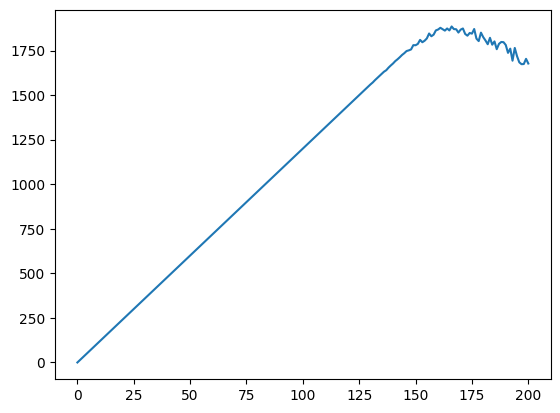

In [17]:
males = 1800
females = 2200

male_sell = 0.03
female_sell = 0.05
cost = 8
price = 20

def gacha_female(): 
    x = np.random.random()
    return 1 if x <= female_sell else 0

def gacha_male(): 
    x = np.random.random()
    return 1 if x <= male_sell else 0

def simulate(n): # n is number of mangoes to buy
    male_buy = [gacha_male() for _ in range(males)]
    female_buy = [gacha_female() for _ in range(females)]

    demand = sum(male_buy) + sum(female_buy)

    sold = min(demand, n) # either you sell out or you don't

    profit = (sold * price) - (n * cost)
    return profit

mangoes = np.arange(0, 201)
profit_for_each = []

for amount in mangoes:
    profit_for_each.append(np.mean([simulate(amount) for _ in range(100)]))

plt.plot(mangoes, profit_for_each)
print(f"Theoretical maximum before profit loss is {mangoes[profit_for_each.index(max(profit_for_each))]} mangoes which yields {max(profit_for_each)} in profits")

### 3)

Let us consider a simplified game of Blackjack. The game is a two-player game: dealer vs player. The goal of the game is get the sum of the card closest to but not over 21.

The cards are counted as follows

1. 2,3,4,5,6,7,8,9 are counted for the number on the card
2. J,Q,K are counted as 10
3. A are counted as either 1 or 11. Whichever one that gets us closer but not over 21.

Here are some example

1. 2, J has the sum of 2+10=12
2. J Q has the sum of 10+10 = 10
3. J A has the sum of 10+11 = 21
4. A 2 J has the sum of 1 + 2 + 10 = 13 (Ace here counts as one since 11 will make the sum over 21)

Here is how the game works:

1. At the beginning each player gets two cards.
2. If one player got 21 with that two cards, that player wins. If both players got 21 with the two cards then it's a draw.
3. The player start first. The player can choose to stop or draw more cards for a chance to improve his/her hand. For this problem we will only consider the algorithm that if the player hand is strictly less than 17 he will draw. If the player has 17 or more, he/will keep drawing until the hand he/she has is 17 or more.
4. If after any draw, the player has more than 21. This is called busted. Once the player is busted the player lose the game immediately.
5. If the player stop drawing, and the dealer will start drawing with the same algorithm explained in 3. That is if the dealer has the sum of less than 17 the dealer will keep drawing until his hand is more than 17.
6. If the dealer is busted, the dealer lose.(Note that if the player is busted, the dealer wins immediately regardless of the result from dealer's draw)
7. If the dealer is not busted, then the sum of player hands and dealer hand are compared. Whoever got the higher number wins.

**Your task**: Suppose we are playing this game with infinite amount of card deck. This means that the next card we draw is independent of the cards that are already out. *Calculate the probability that the player wins*.

In [21]:
import random

values = [2,3,4,5,6,7,8,9,10,10,10,10,11] # assume Ace = 11 for now

def hand_value(hand):
    total = sum(hand)
    aces = hand.count(11)
    while total > 21 and aces: # change ace to 1 if overflow
        total -= 10 
        aces -= 1
    return total


# 0 = player lose or draw
# 1 = player win
def simulation():
    player_hand = [random.choice(values), random.choice(values)]
    dealer_hand = [random.choice(values), random.choice(values)]

    player_win = hand_value(player_hand) == 21
    dealer_win = hand_value(dealer_hand) == 21
    if player_win and dealer_win:
        return 0
    elif player_win and not dealer_win:
        return 1
    elif dealer_win and not player_win:
        return 0

    # player turn
    while hand_value(player_hand) < 17:
        player_hand.append(random.choice(values))
        if hand_value(player_hand) > 21:
            return 0 # bust, dealer win

    # dealer turn
    while hand_value(dealer_hand) < 17:
        dealer_hand.append(random.choice(values))
        if hand_value(dealer_hand) > 21:
            return 1 # bust, player win

    # if both not bust
    if hand_value(player_hand) > hand_value(dealer_hand):
        return 1
    else:
        return 0

def predict_wins(tries=1000):
    return sum([simulation() for _ in range(tries)]) / tries

predict_wins()

0.411

# 4) Queue Theory

In this problem we want to study customer queue.

### 4.1) Poisson process.

The poisson process can be defined by time between 2 customer arrival(TBA) of exponential distribution. 
That is the probility density that the TBA of customer $i$ and customer $i+1$ is $t$ is given by

$$
P(t) = \lambda e^{-\lambda t}
$$

This means that we need to be able to generate a random number in exponential distribution.
The easiest way to do this is Inverse CDF(cumulative distribution function). The main idea is to turn a uniform random number from $0-1$ to the desired distribution. Here is how you do it

- Generate a uniform real random number $x$ from 0-1
- We will pretend that it is the number for CDF. That is 
$$
x = \int_0^t P(t') \text{d}t' = 1- e^{- \lambda t}
$$

- Get $t$ from the above relation that is
$$
    t = - \frac{\log(1-x)}{\lambda}
$$

**Your Task**
write the function ***def exp_rand($\lambda$)*** which random number distributed by exponential distribution.


- Optional: figure out why inverse CDF Method works. It has to do with the fact that differentiate of integral is the original function.

If you do it right you should get this. (Notice how the distribution is reduced by a half when $t=\frac{1}{\lambda}$

<img style="width:300px" src="task1.png"/>

(array([213., 246., 232., 249., 233., 217., 209., 209., 194., 220., 203.,
        184., 157., 188., 161., 163., 180., 166., 167., 163., 147., 154.,
        154., 140., 133., 152., 136., 130., 122., 108., 106.,  99., 117.,
        112., 105.,  89.,  87.,  93., 121.,  71.,  85.,  99.,  93.,  81.,
         88.,  85.,  80.,  81.,  84.,  72.,  81.,  75.,  65.,  69.,  59.,
         85.,  66.,  55.,  51.,  61.,  43.,  42.,  58.,  43.,  62.,  37.,
         51.,  48.,  46.,  40.,  43.,  50.,  40.,  48.,  33.,  45.,  16.,
         30.,  40.,  31.,  32.,  31.,  39.,  38.,  32.,  26.,  25.,  34.,
         21.,  26.,  22.,  43.,  31.,  25.,  20.,  26.,  25.,  23.,  29.]),
 array([0.        , 0.05050505, 0.1010101 , 0.15151515, 0.2020202 ,
        0.25252525, 0.3030303 , 0.35353535, 0.4040404 , 0.45454545,
        0.50505051, 0.55555556, 0.60606061, 0.65656566, 0.70707071,
        0.75757576, 0.80808081, 0.85858586, 0.90909091, 0.95959596,
        1.01010101, 1.06060606, 1.11111111, 1.16161616, 1.21

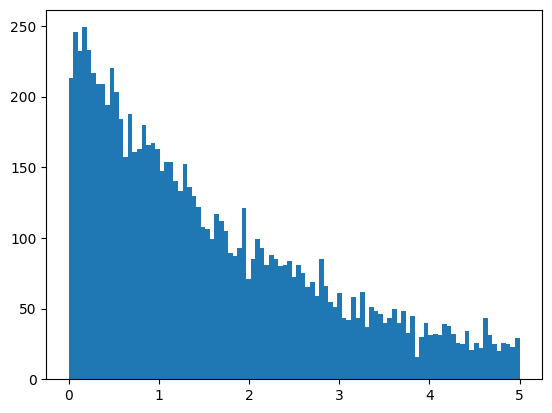

In [58]:
def exp_rand(lmb):
    x = np.random.random()
    t = -math.log(1-x) / lmb
    return t

a = [exp_rand(0.5) for _ in range(10000)]
plt.hist(a, bins=np.linspace(0,5,100))

### 4.2 Generate 1 Day.

What we want to do in this task is to generate the arrival time of all customers with in a day. This can be done by using the fact that the time between two arrivals is exponentially distributed and make sure that the sum of the time is less than $14$

Given that 1 Store day is 14 hours. 

**Your Task** write a function that generate *arrival times* for all people within a day. If $\lambda$ is $300/14 \frac{person}{hour}$ more on the unit in the next part

Hint: np.cumsum is your friend

In [48]:
lambda_rate = 300/14

def simulate(store_hours = 14):
    arrival_times = []
    while True:
        interval = exp_rand(lambda_rate)
        
        if interval + sum(arrival_times) > store_hours:
            break

        arrival_times.append(interval)

    return np.cumsum(arrival_times)

arrival_times = simulate()

print(f"Arrival times: {arrival_times} \n Total customers: {len(arrival_times)}")
        

Arrival times: [1.35201656e-02 5.76913159e-02 1.35910754e-01 2.25425482e-01
 2.40148155e-01 3.40917013e-01 3.46468050e-01 3.46685426e-01
 3.49862511e-01 3.65573928e-01 4.05969350e-01 4.31540336e-01
 4.40741082e-01 4.67118395e-01 4.95452678e-01 5.69171937e-01
 6.07265721e-01 7.09912208e-01 7.27826644e-01 7.66057721e-01
 8.16564151e-01 8.74965247e-01 9.13738179e-01 1.02770601e+00
 1.03500411e+00 1.05977547e+00 1.06989370e+00 1.09808508e+00
 1.24815950e+00 1.25991729e+00 1.26779180e+00 1.31946650e+00
 1.36493894e+00 1.38362789e+00 1.39398764e+00 1.39834156e+00
 1.43225916e+00 1.45942604e+00 1.46155679e+00 1.50320515e+00
 1.53353900e+00 1.55275624e+00 1.68209649e+00 1.70087182e+00
 1.81370257e+00 1.83864758e+00 1.87401276e+00 1.87881632e+00
 1.88217988e+00 1.92722519e+00 1.93376538e+00 2.07271829e+00
 2.08766768e+00 2.08949746e+00 2.10843233e+00 2.15692937e+00
 2.22681372e+00 2.25979890e+00 2.31546674e+00 2.38007071e+00
 2.38035829e+00 2.67134029e+00 2.75900175e+00 2.90022483e+00
 2.937926

### 4.3 

Find the mean of total number who comes into the store in a 14 hour day. You should find that it's exactly $\lambda t$. Hence the unit for $\lambda$

In [57]:
print(np.mean([len(simulate()) for _ in range(1000)]))
print(lambda_rate * 14) # assuming t = time in hours that it is open per day, not the random number

300.101
300.0


### 4.4 (This requires a bit of thinking before writing the code)
Let's supposed that there are 2 cashier registers. Each can process customer at the fixed rate of $5 \frac{minute}{person}$. 

Find the average and standard deviation for waiting time for the customer. (This assume that people stand in one sigle long line and go to the next available cashier). (Wait time doesn't include the fixed processing time of 5 minutes).

Recommended Easy Implementation: Generate a Day. Round it up and simulate the processing by minute-ish resolution should be good enough.


I got 0.10275426621160401 hour.

In [60]:
cashier_rate = 5/60 # per person

arrival_times = simulate()
waiting_times = []

cashier_1_free_time, cashier_2_free_time = 0, 0

for arrival_time in arrival_times:
    if cashier_1_free_time <= cashier_2_free_time:
        # cashier 1 is free
        start_processing_time = max(cashier_1_free_time, arrival_time)
        cashier_1_free_time = start_processing_time + cashier_rate
    else:
        # cashier 2 is free
        start_processing_time = max(cashier_2_free_time, arrival_time)
        cashier_2_free_time = start_processing_time + cashier_rate
    
    waiting_time = start_processing_time - arrival_time
    waiting_times.append(waiting_time)

np.mean(waiting_times)

np.float64(0.10278489086645175)